<a href="https://colab.research.google.com/github/milanjob755/AIDI1002W2026/blob/main/Assignment1AIDI1002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

uploaded = files.upload()

Saving assignment1_dataset.csv to assignment1_dataset.csv


In [14]:
# TODO 1: Load dataset
import pandas as pd

df = pd.read_csv("assignment1_dataset.csv")

# Preview first 5 rows
df.head()

# Print dataset info, data types, and summary statistics
# TODO: Your code here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           20 non-null     object
 1   Gender               20 non-null     object
 2   Age                  20 non-null     int64 
 3   WorkHours            20 non-null     int64 
 4   SleepHours           20 non-null     int64 
 5   AttendanceRate       20 non-null     int64 
 6   PreviousPerformance  20 non-null     int64 
 7   EducationLevel       20 non-null     object
 8   RemoteWork           20 non-null     object
 9   ProductivityScore    20 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 1.7+ KB


,Age,WorkHours,SleepHours,AttendanceRate,PreviousPerformance,ProductivityScore
count,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000
mean,35.550000,8.200000,6.65000,88.75000,81.800000,84.550000
std,6.984758,1.399248,1.03999,6.19741,8.351489,6.723682
min,25.000000,6.000000,5.00000,75.00000,65.000000,72.000000
25%,29.750000,7.000000,6.00000,85.00000,76.500000,79.750000
50%,35.500000,8.000000,7.00000,90.00000,84.000000,85.500000
75%,41.000000,9.000000,7.25000,93.25000,88.250000,88.750000
max,50.000000,11.000000,8.00000,97.00000,93.000000,95.000000


In [32]:
# TODO 2:
# 1. Check for missing values
print("Missing values before cleaning:")

print(df.isnull().sum())

# 2. Fill missing WorkHours with the mean
mean_workhours = df['WorkHours'].mean()
df['WorkHours'] = df['WorkHours'].fillna(mean_workhours) # Addressed FutureWarning: changed to direct assignment

# 3. Fill missing EducationLevel with the mode (These lines are removed as EducationLevel has no missing values and was one-hot encoded earlier)
# mode_educationlevel= df['EducationLevel'].mode()[0]
# df['EducationLevel'].fillna(mode_educationlevel, inplace=True)

# 4. Remove duplicate rows if any
df.drop_duplicates(inplace=True)

print(df.isnull().sum())

df.info()

display(df.head())

Missing values before cleaning:
EmployeeID                 0
Age                        0
WorkHours                  0
SleepHours                 0
AttendanceRate             0
PreviousPerformance        0
RemoteWork                 0
ProductivityScore          0
WellnessIndex              0
AttendanceCategory         0
Gender_Male                0
EducationLevel_Bachelor    0
EducationLevel_Master      0
EducationLevel_PhD         0
dtype: int64
EmployeeID                 0
Age                        0
WorkHours                  0
SleepHours                 0
AttendanceRate             0
PreviousPerformance        0
RemoteWork                 0
ProductivityScore          0
WellnessIndex              0
AttendanceCategory         0
Gender_Male                0
EducationLevel_Bachelor    0
EducationLevel_Master      0
EducationLevel_PhD         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                

,EmployeeID,Age,WorkHours,SleepHours,AttendanceRate,PreviousPerformance,RemoteWork,ProductivityScore,WellnessIndex,AttendanceCategory,Gender_Male,EducationLevel_Bachelor,EducationLevel_Master,EducationLevel_PhD
0,E001,29,-0.146647,7,0.538036,78,1,82,56,High,True,True,False,False
1,E002,34,0.586588,6,-0.124162,85,0,87,54,Medium,False,False,True,False
2,E003,41,1.319824,5,1.034685,90,0,92,50,High,True,False,False,True
3,E004,26,-0.879883,8,-0.620811,72,1,79,56,Medium,False,True,False,False
4,E005,38,0.586588,6,0.206937,88,1,86,54,High,True,False,True,False


In [17]:
# TODO 4:
from sklearn.preprocessing import StandardScaler

# Encode Gender and EducationLevel using one-hot encoding
df = pd.get_dummies(df, columns=['Gender','EducationLevel'],drop_first=True)

# Convert RemoteWork (Yes/No) into numerical form (0/1)
df['RemoteWork']=df['RemoteWork'].map({'Yes': 1, 'No': 0})

# Scale WorkHours and AttendanceRate using StandardScaler
scaler = StandardScaler()
df[['WorkHours','AttendanceRate']]=scaler.fit_transform(df[['WorkHours','AttendanceRate']])

display(df.head())

df.info()

,EmployeeID,Age,WorkHours,SleepHours,AttendanceRate,PreviousPerformance,RemoteWork,ProductivityScore,WellnessIndex,AttendanceCategory,Gender_Male,EducationLevel_Bachelor,EducationLevel_Master,EducationLevel_PhD
0,E001,29,-0.146647,7,0.538036,78,1,82,56,High,True,True,False,False
1,E002,34,0.586588,6,-0.124162,85,0,87,54,Medium,False,False,True,False
2,E003,41,1.319824,5,1.034685,90,0,92,50,High,True,False,False,True
3,E004,26,-0.879883,8,-0.620811,72,1,79,56,Medium,False,True,False,False
4,E005,38,0.586588,6,0.206937,88,1,86,54,High,True,False,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               20 non-null     object  
 1   Age                      20 non-null     int64   
 2   WorkHours                20 non-null     float64 
 3   SleepHours               20 non-null     int64   
 4   AttendanceRate           20 non-null     float64 
 5   PreviousPerformance      20 non-null     int64   
 6   RemoteWork               20 non-null     int64   
 7   ProductivityScore        20 non-null     int64   
 8   WellnessIndex            20 non-null     int64   
 9   AttendanceCategory       20 non-null     category
 10  Gender_Male              20 non-null     bool    
 11  EducationLevel_Bachelor  20 non-null     bool    
 12  EducationLevel_Master    20 non-null     bool    
 13  EducationLevel_PhD       20 non-null     bool    
dtypes: bool(4), 

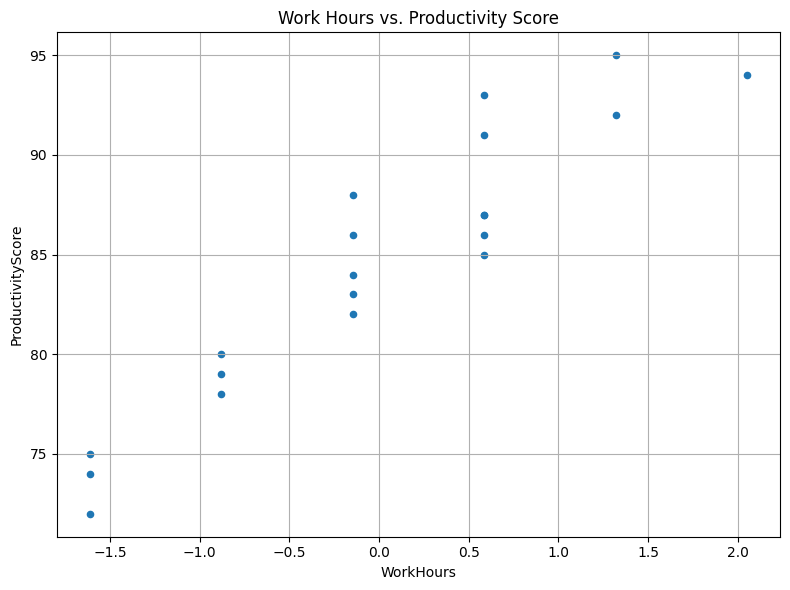

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot 1: Scatter plot for 'WorkHours' vs 'ProductivityScore'
# Create a new figure for this plot
plt.figure(figsize=(8, 6))
df.plot(kind='scatter',x='WorkHours',y='ProductivityScore',ax=plt.gca())
plt.title('Work Hours vs. Productivity Score')
plt.xlabel('WorkHours')
plt.ylabel('ProductivityScore')
plt.grid(True)
plt.tight_layout()
plt.show()

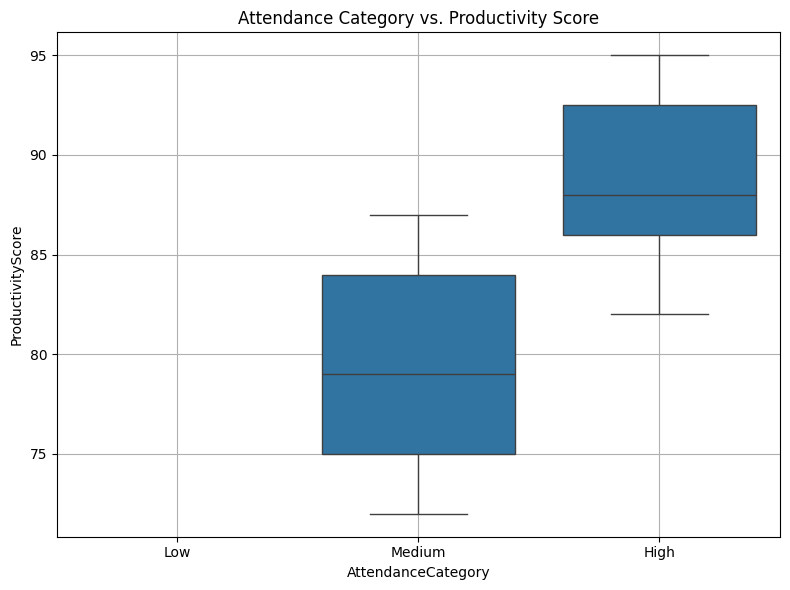

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot 2: Boxplot for 'AttendanceCategory' vs 'ProductivityScore'
plt.figure(figsize=(8, 6))
sns.boxplot(x='AttendanceCategory',y='ProductivityScore',data=df, ax=plt.gca())
plt.title('Attendance Category vs. Productivity Score')
plt.xlabel('AttendanceCategory')
plt.ylabel('ProductivityScore')
plt.grid(True)
plt.tight_layout()
plt.show()

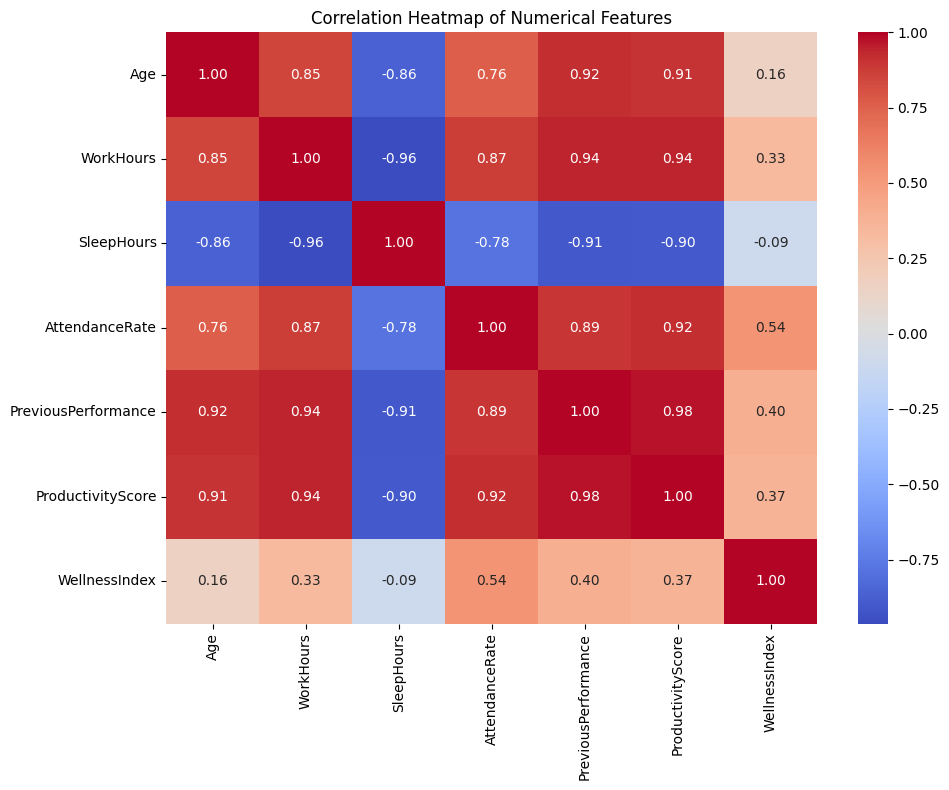

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot 3: Correlation Heatmap of Numerical Features
plt.figure(figsize=(10, 8))
numerical_cols=['Age','WorkHours','SleepHours','AttendanceRate','PreviousPerformance','ProductivityScore','WellnessIndex']
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,map='coolwarm',fmt='.2f',ax=plt.gca())
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

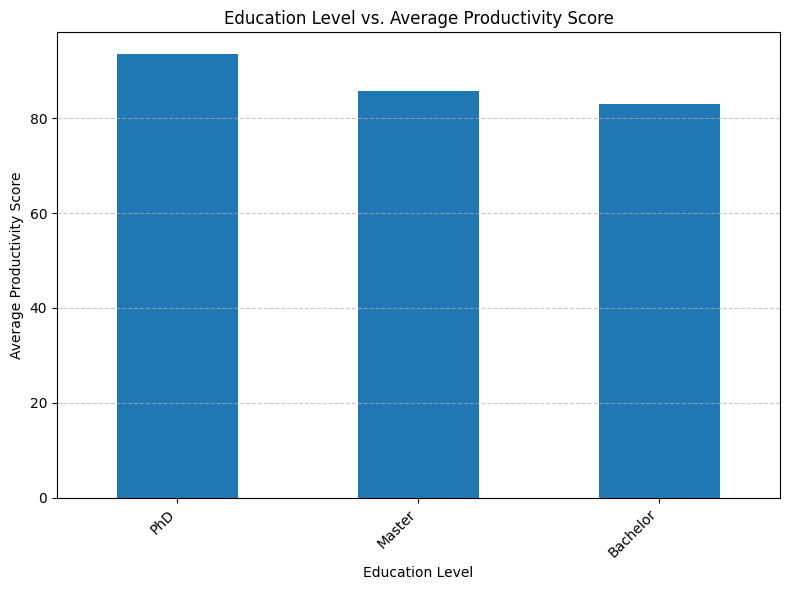

In [24]:
# Plot 4: Bar chart for 'EducationLevel' vs 'ProductivityScore'
# Reconstruct mean productivity by education level from one-hot encoded columns
mean_productivity_by_education = {}
if'EducationLevel_Bachelor' in df.columns:
    mean_productivity_by_education['Bachelor']=df[df['EducationLevel_Bachelor'] == True]['ProductivityScore'].mean()
if'EducationLevel_Master' in df.columns:
    mean_productivity_by_education['Master']=df[df['EducationLevel_Master']==True]['ProductivityScore'].mean()
if'EducationLevel_PhD' in df.columns:
    mean_productivity_by_education['PhD']=df[df['EducationLevel_PhD']==True]['ProductivityScore'].mean()

mean_productivity_series=pd.Series(mean_productivity_by_education).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
mean_productivity_series.plot(kind='bar', ax=plt.gca())
plt.title('Education Level vs. Average Productivity Score')
plt.xlabel('Education Level')
plt.ylabel('Average Productivity Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

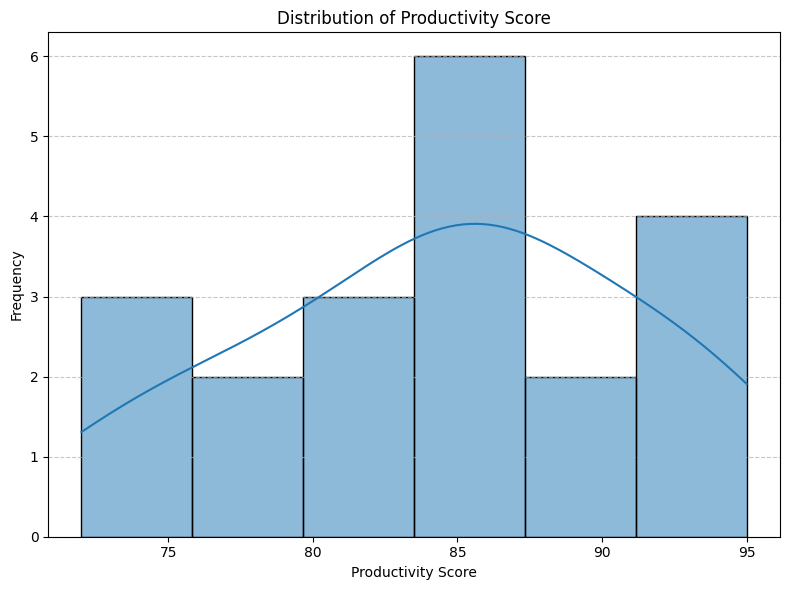

In [28]:
# Plot 5: Histogram of 'ProductivityScore'
plt.figure(figsize=(8, 6))
sns.histplot(df['ProductivityScore'], kde=True, ax=plt.gca())
plt.title('Distribution of Productivity Score')
plt.xlabel('Productivity Score')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

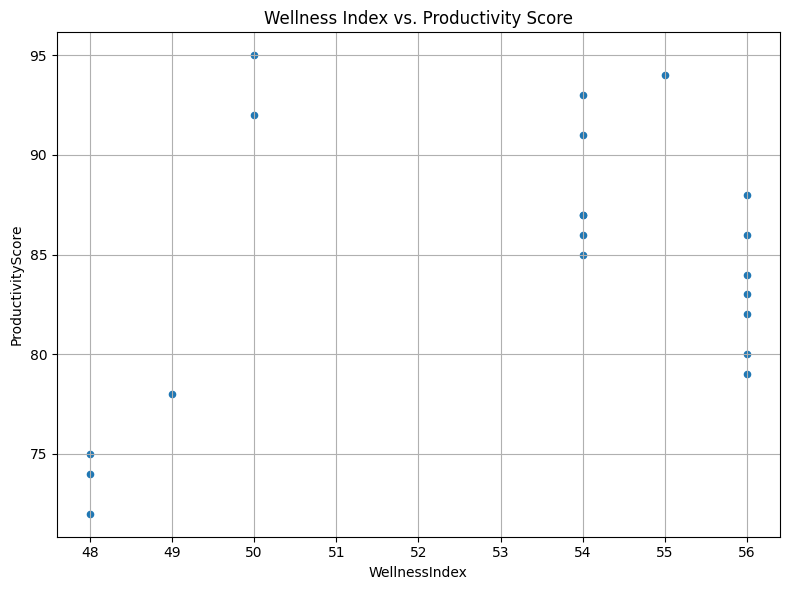

In [29]:
# Plot 6: Scatter plot for 'WellnessIndex' vs 'ProductivityScore'
plt.figure(figsize=(8,6))
df.plot(kind='scatter',x='WellnessIndex',y='ProductivityScore',ax=plt.gca())
plt.title('Wellness Index vs. Productivity Score')
plt.xlabel('WellnessIndex')
plt.ylabel('ProductivityScore')
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
#Write a 3-line summary of insights based on the visualizations

#Here There is a Strong Positive Correlation with productivityScore and previousPerformance, WorkHours, Age , attendanceRate and WellnessIndex.
#There is a strong Negative correlation between sleephours and ProductivityScore. Here it is a little strange here people with less sleep tend to have more productivity.
#employees with High Attendance tend to have highter productivity score compared to those with low attendance.
#older employees in the dataset tend to have higher history of strong performance which correlates with their current productivityScore.